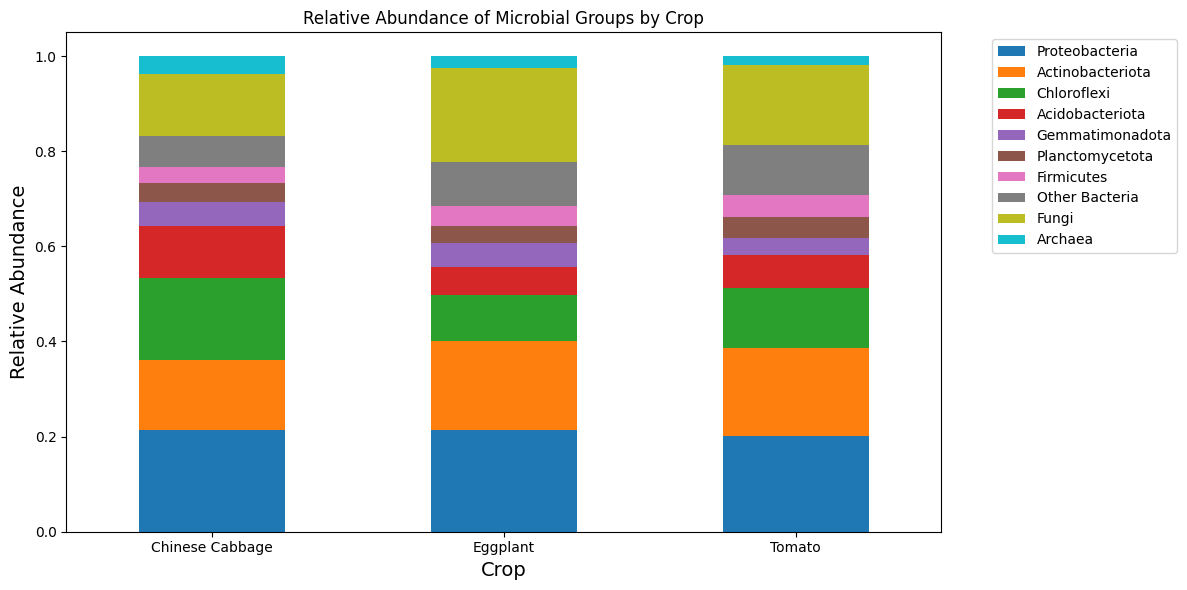

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/all_phyla_crop_data.csv")

# Drop rows missing key taxonomic levels
df = df.dropna(subset=["Kingdom", "Phylum", "Crop"])

# Title-ize the crops for axis label use
df["Crop"] = df["Crop"].str.title()

# Count occurrences of each Phylum within each Crop
phylum_counts = df.groupby(["Crop", "Phylum"]).size().unstack(fill_value=0)

# Calculate relative abundance per crop
relative_abundance = phylum_counts.div(phylum_counts.sum(axis=1), axis=0)

# Identify top 8 phyla overall
top_phyla = relative_abundance.sum().sort_values(ascending=False).head(8).index

# Group remaining phyla as "Other Bacteria" or by Kingdom
def group_phylum(phylum, kingdom):
    if kingdom != "Bacteria":
        return kingdom
    elif phylum in top_phyla:
        return phylum
    else:
        return "Other Bacteria"

# Apply group mapping
df["Group"] = df.apply(lambda row: group_phylum(row["Phylum"], row["Kingdom"]), axis=1)

# Recalculate grouped counts
grouped_counts = df.groupby(["Crop", "Group"]).size().unstack(fill_value=0)

# Normalize for relative abundance
grouped_rel = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Define all groups we want to plot
expected_groups = top_phyla.tolist() + ["Other Bacteria", "Fungi", "Archaea"]

# Filter to only those that exist in the data
available_groups = [group for group in expected_groups if group in grouped_rel.columns]

# Plot
ax = grouped_rel[available_groups].plot(
    kind="bar", stacked=True, figsize=(12, 6)
)

plt.title("Relative Abundance of Microbial Groups by Crop", fontsize=18)
plt.ylabel("Relative Abundance", fontsize=14)
plt.xlabel("Crop", fontsize=14)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Save the figure BEFORE plt.show()
fig = ax.get_figure()
fig.savefig('./created_content/phyla_bar_chart.png', dpi=300)  # You can specify dpi for quality


plt.show()
